# 案例：假设你是一家餐厅的CEO，正在考虑开一家分店，根据该城市的人口数据预测其利润。

In [42]:
#Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#绝对路径
path="/home/alex/test/NG_exercise/ex1_linearRegression/ex1data1.txt"
#header=None使用文件默认标题，header=2表示第三行是数据，第二行是标题栏
data=pd.read_csv(path, header=None, names=['Population','Profits'])
data.head()

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [43]:
data.describe()

,Population,Profits
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [44]:
data.tail()#后五行

,Population,Profits
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [45]:
data.info()#数据整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profits       97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


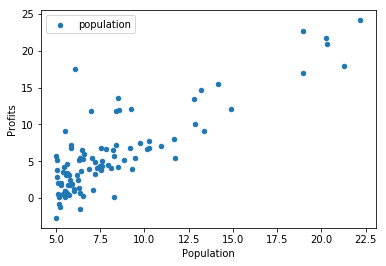

In [46]:
#遇到bug，x,y轴既然命名标签，赋值传递时候就得一致
data.plot.scatter('Population','Profits',label='population') 
plt.show()

In [47]:
data.insert(0,'one',1)#插入一列的原因是 theta0 + theta1 * x
data.head()

,one,Population,Profits
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [48]:
# tempdata=data.iloc[0:3,:] #只取前三行
tempdata=data.iloc[0:3,0:2] #只取前三行,1,2列
# tempdata=data.iloc[:,1:3] #只取1,2列
tempdata.head()

,one,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186


In [49]:
tempdata.shape

(3, 2)

In [50]:
tempdata.values

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186]])

In [51]:
X = data.iloc[:,0:-1]#X,Y是我们真实需要的数据
X.head() #X是训练样本，y是目标

,one,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [52]:
X.shape

(97, 2)

In [53]:
y=data.iloc[: ,2]#等价于Y=data.iloc[:,-1]，只取最后一列
print(y.shape, type(y))
#这里是生成的是Series，我们需要的是DataFrame格式

(97,) <class 'pandas.core.series.Series'>


In [54]:
y=y.values.reshape(97,1)#遇到bug原来代码是y=y.reshape(97,1)
y.shape

(97, 1)

In [55]:
def cost_function(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [56]:
#矩阵各种乘法总结：
#numpy中：     *,数学中的点乘, np.dot(a, b)矩阵相乘
#tensorflow中： * 或者 tf.multiply(a, b) 点乘， tf.matmul(a, b) 矩阵相乘

In [57]:
theta=np.zeros((2, 1))
theta.shape
#Pandas中的两种数据类型：series, dataframe真很难转化

(2, 1)

In [60]:
cost_init=cost_function(X, y, theta)
print(type(cost_init))
print(cost_init.values) #这里用到values提取数值位
# print("costinit",cost_init.size)

<class 'pandas.core.series.Series'>
[32.07273388]


In [ ]:
def gradient_descent(x, y, theta, alpha, inters):
    costs = []
    
    for i in range(iters):
        theta = theta - alpha / len(X) * (X.T @ (X@theta - y)) 
        cost = cost_function(X, y, theta)
        costs.append(cost)
    
        if i % 100 == 0:
            print(cost.values)
        
    return theta,costs

In [ ]:
alpha = 0.02
iters = 2000

theta,costs = gradient_descent(X, y, theta, alpha, iters)

In [ ]:
fig,ax = plt.subplots()  #fig,ax分别指的是图像和实例
ax.plot(np.arange(iters), costs, 'r')
ax.set(xlabel='iter',
       ylabel='cost',
       title='cost and iters')  #单词拼错了，xlabel
plt.show()

In [356]:
theta.values

array([[-3.8928815 ],
       [ 1.19274237]])

In [357]:
print(type(X))  #多次因为类型问题入坑,DataFrame才有values
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


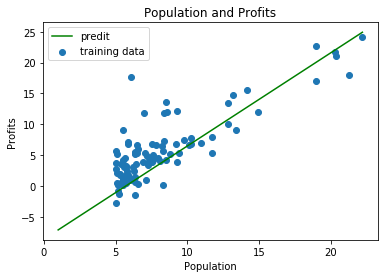

In [365]:
#linspace生成线性等分向量
x = np.linspace(y.min(), y.max(), 100)
y_profits = theta.values[0,0] + theta.values[1,0] * x

fig, ax = plt.subplots()
ax.scatter(X.values[:,1], y, label='training data')

#对下面进行了修改
x_axis = np.linspace(X.values.min(),X.values.max(),100)
#x改为x_axis,原来似乎不是那么合理
# ax.plot(x, y_profits, 'g', label='predit')
ax.plot(x_axis, y_profits, 'g', label='predit')

ax.legend() #legend显示标签(刻印文字)
ax.set(xlabel='Population',
       ylabel='Profits',
       title='Population and Profits')
plt.show()

# 多变量线性回归案例，卖房子（根据面积，卧室数量,估测房子的价格)

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [293]:
path = '/home/alex/test/NG_exercise/ex1_linearRegression/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['size', 'roomnum', 'price'])
data2.head()

,size,roomnum,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [294]:
def normalize_feature(data):
    return (data - data.mean())/data.std()

In [295]:
data2 = normalize_feature(data2)
data2.head()

,size,roomnum,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


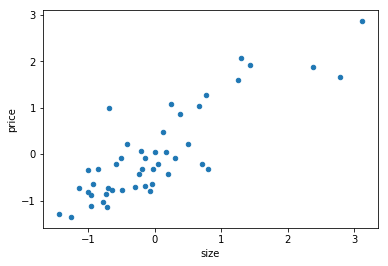

In [296]:
data2.plot.scatter('size', 'price')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

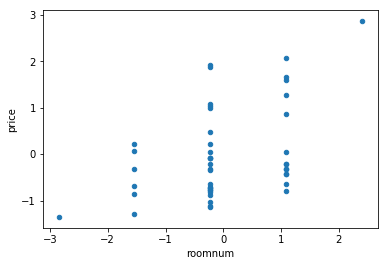

In [297]:
data2.plot.scatter('roomnum', 'price')
plt.show

In [298]:
data2.insert(0, 'ones', 1)
data2.head()

,ones,size,roomnum,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [299]:
#data2 = np.matrix(data2)  #一种DataFrame转化为Matrix的方法

In [300]:
X = data2.iloc[:,0:3]
X.head()

,ones,size,roomnum
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [301]:
X.info() #只有DataFrame类型有info方法

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
ones       47 non-null int64
size       47 non-null float64
roomnum    47 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [302]:
X = X.values
type(X)

numpy.ndarray

In [303]:
X.shape

(47, 3)

In [304]:
y = data2.iloc[:,3:]
y.head()

,price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [305]:
y = y.values

In [306]:
y.shape

(47, 1)

In [307]:
print(type(y))

<class 'numpy.ndarray'>


In [308]:
def cost_function(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner)/(2 * len(X))

In [309]:
theta = np.zeros((3, 1))

In [310]:
cost_init = cost_function(X, y, theta)
print(cost_init)

0.48936170212765967


In [311]:
def gradient_descent(X, y, theta, alpha, iters):
    costs = []
    for i in range(iters):
        theta = theta - alpha * (X.T @ (X@theta - y)) / len(X)
        cost = cost_function(X, y, theta)
        costs.append(cost)
        
        if i % 100 == 0:
            #print(cost)
            pass
        
    return theta,costs

In [312]:
candidate_alpha = [0.0003, 0.003, 0.03, 0.3]
iters = 2000

theta_, costs = gradient_descent(X, y, theta, 0.01, iters)#4 test
print(len(costs))#这里遇到坑，costs是一维,return位置不对

2000


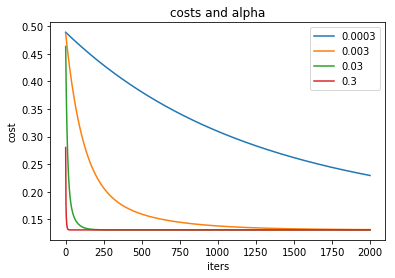

In [313]:
fig, ax = plt.subplots()
for alpha in candidate_alpha:
    theta_out, costs = gradient_descent(X, y, theta, alpha, iters)
    ax.plot(np.arange(iters), costs, label=alpha)
    ax.legend()
    
ax.set(xlabel='iters',
       ylabel='cost',
       title='costs and alpha')
plt.show()

ValueError: Unable to coerce to DataFrame, shape must be (97, 1): given (47, 1)

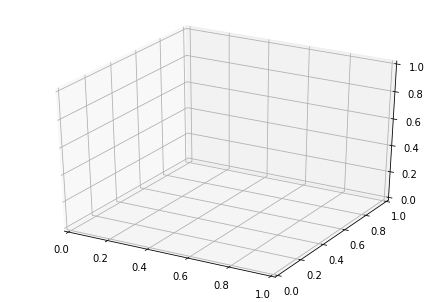

In [367]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
y_axis = data2.iloc[:,2:3].values
theta_, costs = gradient_descent(X, y_axis, theta, 0.001, 2000)
print(type(np.array(costs)))
print(type(X))
print(type(y_axis))
ax.plot_surface(X, y_axis, costs)
plt.show()
#房价，房屋面积，卧室数量之间的关系还没有实现，回来再整

# 正规方程实现求取theta

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
path="/home/alex/test/NG_exercise/ex1_linearRegression/ex1data1.txt"
data3 = pd.read_csv(path, names=['Population','Profits'])

In [76]:
data3.insert(0, 'ones', 1)

In [6]:
data3.head()

,ones,Population,Profits
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [42]:
X = data3.iloc[:,0:2]
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [43]:
y = data3.iloc[:,-1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profits, dtype: float64

In [44]:
X = X.values

In [45]:
y = y.values

In [46]:
X.shape

(97, 2)

In [47]:
y.shape

(97,)

In [48]:
y = y.reshape(97,1); #交互环境，加;号不显示结果

In [49]:
y.shape

(97, 1)

In [52]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T@X) @ X.T @ y
    return theta

In [53]:
theta = normal_equation(X, y)

In [54]:
print(theta)

[[-3.89578088]
 [ 1.19303364]]
